In [1]:
# Importing data
import pandas as pd
import numpy as np
dataset = pd.read_csv('phl_exoplanet_catalog_2019.csv')

After taking a closer look at the datasets mentioned, I learned that PHL Exoplanet Catalog, can fulfill the goal I have set this project. PHL Exoplanet Catalog, is extracted from The Habitable Exoplanet Catalog (HEC), which is an online database of potentially habitable world discoveries and was established on December 2011. This catalog is aimed for scientists, educators and general public. The reason I decided to use this dataset is that it has one attribute of my interest, which is “P_HABITABLE” and is filled with 3 nominal values:

- 0 for inhabitable
- 1 for conservatively habitable 
- 2 for optimistically habitable
Although the PSCompPars dataset of NASA is more updated and contains 5220 exoplanets, PHL catalog was a cleaner dataset with more helpful attributes for this particular research which is based on Supervised Learning.

Methodology (Supervised)
1.Preprocessing Dealing with missing data: Ignore columns with more that 40% missing data Fill in with mode (for categorical features Impute using MICE (for numeric features)
2. Feature Selection Random Forest AdaBoost Regressor Extra Trees Classifier
3. Modeling Normalization with MinMax scalar Decision Tree Classification KNN Classification Gradient Boosting Classification

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [3]:
print(dataset.isnull().sum())

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


<Axes: >

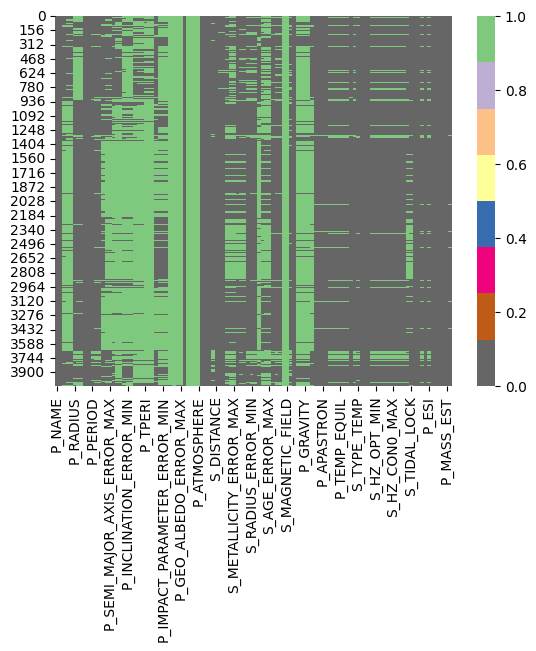

In [4]:
# Visualizing the missing data
import seaborn as sns
sns.heatmap(dataset.isnull(), cmap='Accent_r')

Since only some of the ML algorithms can tolerate missing values, we better deal with missing values before starting the implementation of the methods and algorithms we are going to use.

In [6]:
#Calculate the total number of examples
count = dataset.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).\
sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(5)

,Count,%
P_DETECTION_MASS,4048,100.0
P_GEO_ALBEDO,4048,100.0
S_MAGNETIC_FIELD,4048,100.0
S_DISC,4048,100.0
P_ATMOSPHERE,4048,100.0


In [7]:
#Drop columns containing more than 40% missing data
dataset_cols_dropped = dataset.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',\
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES', \
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',\
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', \
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY', \
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA', \
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',\
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE', \
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN', \
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX',\
'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX', \
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'], \

axis = 1)

In [8]:
dataset_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   float64
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4048 non-null   int64  
 6   P_UPDATED                4048 non-null   object 
 7   P_PERIOD                 3938 non-null   float64
 8   P_PERIOD_ERROR_MIN       3807 non-null   float64
 9   P_PERIOD_ERROR_MAX       3807 non-null   float64
 10  P_DETECTION              4048 non-null   object 
 11  S_NAME                   4048 non-null   object 
 12  S_RA                     4048 non-null   float64
 13  S_DEC                    4048 non-null   float64
 14  S_MAG                   

In [9]:
#Print the categorical features
dataset_cols_dropped.select_dtypes(include = ['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_ALT_NAMES', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [10]:
#Single the missing data out - categorical features

#Put the categorial columns in the object_cols
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

#Print the percentage of each column which belongs to the missing data
count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


No missing data except for columns P_TYPE_TEMP, S_TYPE_TEMP, and P_TYPE. ASSUMPTION: Although there is a reason for having these missing values in the dataset, which is lack of information, we have to assume that the data we are dealing with, is MAR (Missing At Random), so that we can use fill-in the missing data methods.

In [11]:
#Fill in the missing data in categorical columns using mode

dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP']\
.fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].\
fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna\
(dataset_cols_dropped['P_TYPE'].mode()[0])